### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import datetime as dt

from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split, GridSearchCV
from keras.layers import Dense
from keras.models import Sequential
import xgboost as xgb

### Import Dataset

In [2]:
df = pd.read_csv("TransactionsTestDataset.csv")
df.sample(5)

,Platform,userid,IN-APP PRODUCTID,Country,Price in local currency,Currency,Timestamp
7048,ANDROID,5.968982333,rio16.shields,US,4.99,USD,13/02/2017 09:50
7540,ANDROID,6.704072148,pack7.shields,IT,0.89,EUR,21/01/2017 10:54
6208,ANDROID,6.828641274,offer4,US,3.99,USD,14/03/2017 20:45
7006,ANDROID,6.820562739,pack2.cash,FR,3.59,EUR,14/02/2017 06:15
7816,ANDROID,5.865925572,pack2.shields,US,4.51,USD,06/01/2017 08:43


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8853 entries, 0 to 8852
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Platform                   8853 non-null   object 
 1   userid                     8853 non-null   object 
 2   IN-APP PRODUCTID           8853 non-null   object 
 3   Country                    8853 non-null   object 
 4    Price in local currency   8853 non-null   float64
 5   Currency                   8853 non-null   object 
 6   Timestamp                  8853 non-null   object 
dtypes: float64(1), object(6)
memory usage: 484.3+ KB


**Change userid to categories**

In [4]:
df["userid"] = df["userid"].astype("category").cat.codes

**Rename Column**

In [5]:
df = df.rename(columns = {" Price in local currency ": "Price in local currency"})

**Insights of rows having Currency 0**

In [6]:
df[df["Currency"] == "0"]

,Platform,userid,IN-APP PRODUCTID,Country,Price in local currency,Currency,Timestamp
3,ANDROID,2946,offer4,US,0.0,0,27/03/2017 16:58
5,ANDROID,2946,offer4,US,0.0,0,27/03/2017 16:32
6,ANDROID,2946,offer4,US,0.0,0,27/03/2017 16:28
23,ANDROID,2768,pack2.shields,FR,3.0,0,26/03/2017 19:17
42,ANDROID,2750,pack2.shields,US,0.0,0,25/03/2017 22:27
...,...,...,...,...,...,...,...
7193,ANDROID,2286,offer4,US,0.0,0,06/02/2017 15:39
7203,ANDROID,605,pack2.shields,US,0.0,0,05/02/2017 20:07
7266,ANDROID,2241,offer4,US,0.0,0,03/02/2017 16:02
7351,ANDROID,2167,offer4,US,0.0,0,29/01/2017 19:46


**Remove these rows from data**

In [7]:
mask = df['Currency'].isin(["0"])

df = df[~mask]

In [8]:
mask2 = df['userid'].isin(['#NUM!'])
df = df[~mask2]

**Create Date Column**

In [9]:
# Extract Date
df["Date"] = df["Timestamp"].str.split(" ").str.get(0)

# Convert to datetime dtype
df["Date"] = pd.to_datetime(df["Date"])

**Delete Timestamp Column**

In [10]:
del df["Timestamp"]

In [11]:
def currency(column):
    x = column[0]
    y = column[1]
    if x == "EUR":
        return y * 1.05
    
    elif x == "KRW":
        return y * 0.00079
    
    elif x == "GBP":
        return y * 1.26
    
    elif x == "CAD":
        return y * 0.78
    
    elif x == "TRY":
        return y * 0.067
    
    elif x == "BRL":
        return y * 0.20
    
    elif x == "IDR":
        return y * 0.000069
    
    elif x == "RUB":
        return y * 0.014
    
    elif x == "CLP":
        return y * 0.0012
    
    elif x == "THB":
        return y * 0.029
    
    elif x == "SEK":
        return y * 0.10
    
    elif x == "NOK":
        return y * 0.11
    
    elif x == "JPY":
        return y * 0.0077
    
    elif x == "UAH":
        return y * 0.033
    
    elif x == "RON":
        return y * 0.21
    
    elif x == "CHF":
        return y * 1.03
    
    elif x == "LBP":
        return y * 0.00066
    
    elif x == "MYR":
        return y * 0.23
    
    elif x == "TWD":
        return y * 0.034
    
    elif x == "PHP":
        return y * 0.019
    
    elif x == "AED":
        return y * 0.27
    
    elif x == "MXN":
        return y * 0.049
    
    elif x == "ZAR":
        return y * 0.063
    
    elif x == "AUD":
        return y * 0.71
    
    elif x == "HRK":
        return y * 0.14
    
    elif x == "CNY":
        return y * 0.15
    
    elif x == "ILS":
        return y * 0.30
    
    else:
        return y * 1


df["Price in USD"] = df[["Currency", "Price in local currency"]].apply(currency, axis = 1)

### Data Analysis and Visualization

**Number of Times Platform used by Customers**

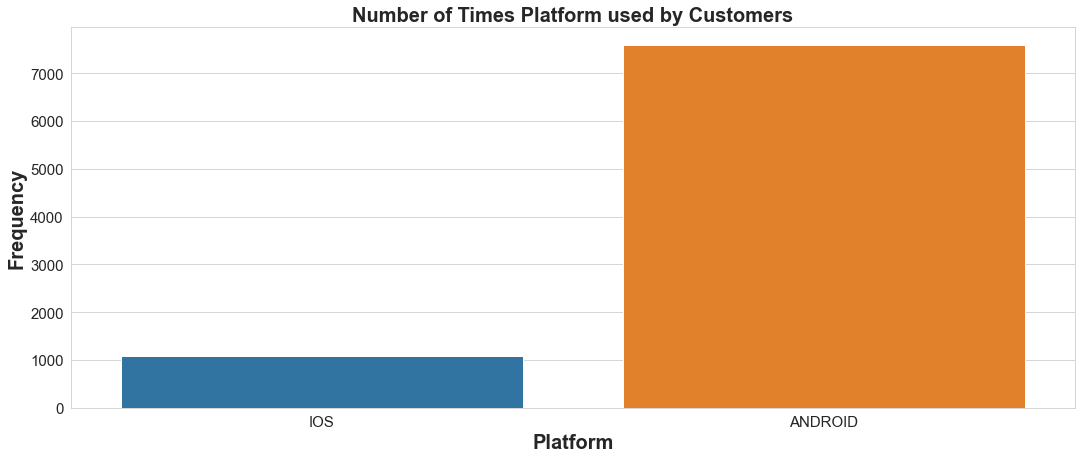

In [12]:
plt.figure(figsize = (18, 7))
sns.countplot(x = "Platform", data = df)
plt.title("Number of Times Platform used by Customers", weight = "bold", size = 20)
plt.xlabel("Platform", size = 20, weight = "bold")
plt.ylabel("Frequency", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Top 10 Most Repeated Customers**

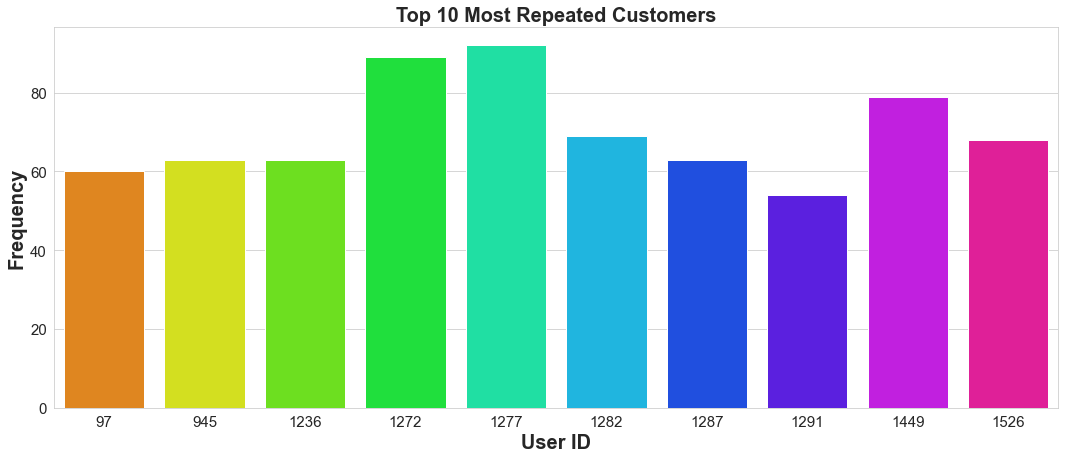

In [13]:
repeated_customers = df["userid"].value_counts().to_frame().reset_index()
repeated_customers.columns = ["User ID", "Frequency"]
repeated_customers = repeated_customers.head(10)

plt.figure(figsize = (18, 7))
sns.barplot(x = "User ID", y = "Frequency", data = repeated_customers, palette = "hsv")
plt.title("Top 10 Most Repeated Customers", weight = "bold", size = 20)
plt.xlabel("User ID", size = 20, weight = "bold")
plt.ylabel("Frequency", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Number of Times IN-APP-PRODUCTS used by Customers**

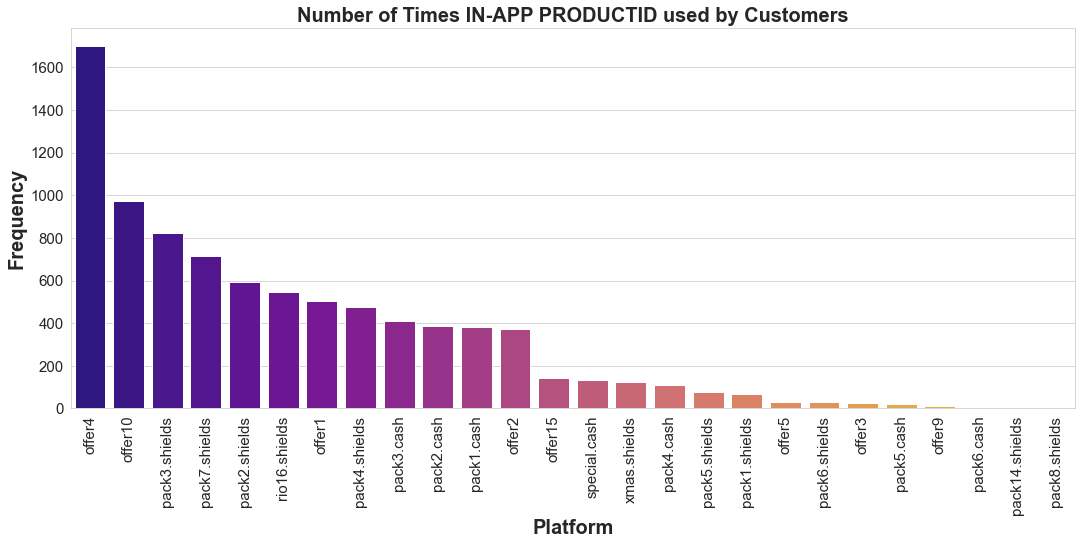

In [14]:
app_products = df["IN-APP PRODUCTID"].value_counts().to_frame().reset_index()
app_products.columns = ["IN-APP PRODUCTID", "Frequency"]

plt.figure(figsize = (18, 7))
sns.barplot(x = "IN-APP PRODUCTID", y = "Frequency", data = app_products, palette = "plasma")
plt.title("Number of Times IN-APP PRODUCTID used by Customers", weight = "bold", size = 20)
plt.xlabel("Platform", size = 20, weight = "bold")
plt.ylabel("Frequency", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.show()

**Total Customers by Countries**

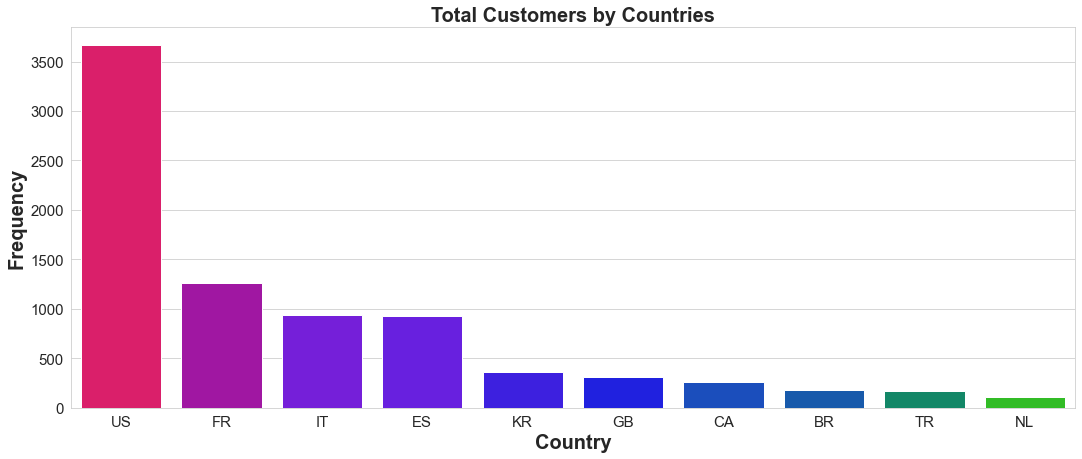

In [15]:
country_customers = df["Country"].value_counts().to_frame().reset_index()
country_customers.columns = ["Country", "Frequency"]
country_customers = country_customers.head(10)

plt.figure(figsize = (18, 7))
sns.barplot(x = "Country", y = "Frequency", data = country_customers, palette = "prism")
plt.title("Total Customers by Countries", weight = "bold", size = 20)
plt.xlabel("Country", size = 20, weight = "bold")
plt.ylabel("Frequency", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Customer Lifetime Value

**References:**

1. https://www.datacamp.com/community/tutorials/customer-life-time-value
2. https://www.datacamp.com/community/tutorials/customer-life-time-value

**Select Relevant Columns**

In [16]:
df = df[["userid", "Date", "Price in USD"]]
df.head()

,userid,Date,Price in USD
0,282,2017-03-28,1.9900
1,2947,2017-03-27,3.9900
2,2941,2017-03-27,4.0092
4,204,2017-03-27,2.0895
7,736,2017-03-27,1.8795


**In the dataset, the last order date is December 03, 2017, we have used this date as NOW date to calculate recency.**

In [17]:
now = dt.datetime(2017, 12, 3)

In [18]:
df["Invoice"] = df[["Date"]]

In [19]:
rfm = df.groupby("userid").agg({"Date":         lambda x: (now - x.max()).days,  # Recency
                                "Invoice":         lambda x: x.count(),             # Frequenxy
                                "Price in USD": lambda x: x.sum()})              # Monetary
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.head()

,Recency,Frequency,Monetary
userid,,,
0,336,6,46.4385
1,345,1,9.4395
2,122,1,2.0895
3,277,1,4.1895
4,280,3,20.1222


**Calculate frequency and percentage of number of transactions**

In [20]:
def frequency(x):
    if x == 1:
        return "1"
    
    elif x == 2:
        return "2"
    
    elif x == 3:
        return "3"
    
    elif x == 4:
        return "4"
    
    elif x == 5:
        return "5"
    
    elif x >= 6 and x <= 10:
        return "6-10"
    else:
        return "10+"
    
transactions_frequency = rfm["Frequency"].apply(frequency)

In [21]:
tft = transactions_frequency.value_counts().to_frame().reset_index()
tft.columns = ["Category", "Transactions"]
tft["Percentage"] = (tft["Transactions"] / tft["Transactions"].sum() * 100)
tft

,Category,Transactions,Percentage
0,1,1571,54.322268
1,2,549,18.983402
2,3,252,8.713693
3,6-10,177,6.120332
4,10+,131,4.529737
5,4,130,4.495159
6,5,82,2.835408


**Frequency of Transactions by Groups**

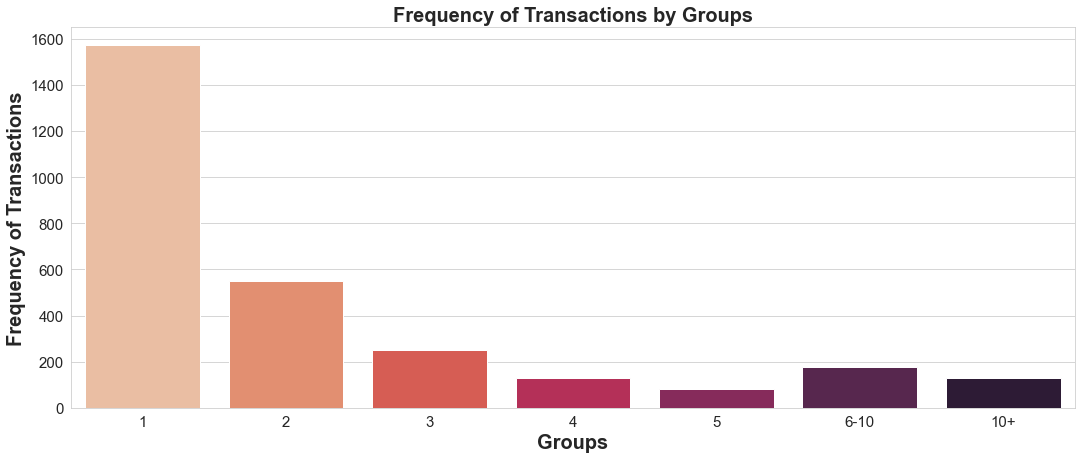

In [22]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Category", y = "Transactions", data = tft, order = ["1", "2", "3", "4", "5", "6-10", "10+"], palette = "rocket_r")
plt.title("Frequency of Transactions by Groups", weight = "bold", size = 20)
plt.xlabel("Groups", size = 20, weight = "bold")
plt.ylabel("Frequency of Transactions", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Percentage of Transactions by Groups**

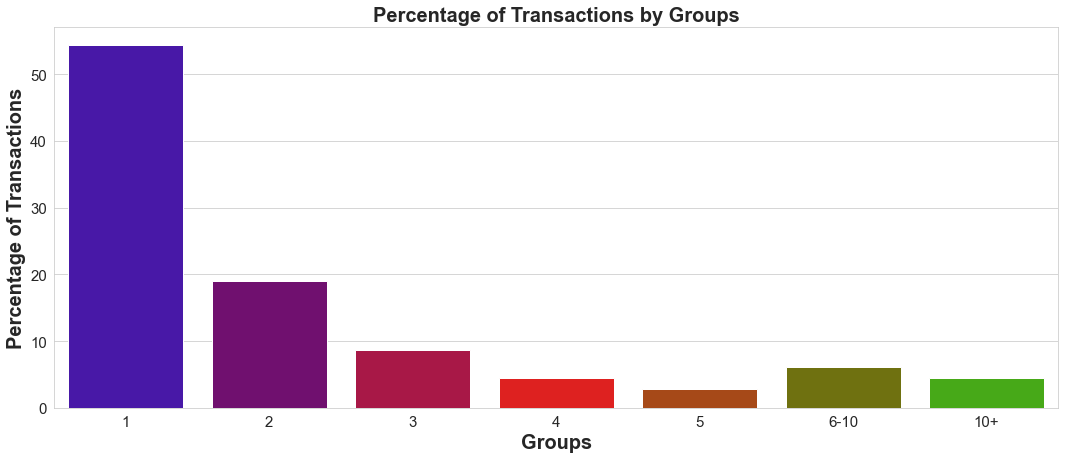

In [23]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Category", y = "Percentage", data = tft, order = ["1", "2", "3", "4", "5", "6-10", "10+"], palette = "brg")
plt.title("Percentage of Transactions by Groups", weight = "bold", size = 20)
plt.xlabel("Groups", size = 20, weight = "bold")
plt.ylabel("Percentage of Transactions", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**1. Calculate Average Order Value**

In [24]:
rfm["average_order_value"] = rfm["Monetary"] / rfm["Frequency"]
rfm.head()

,Recency,Frequency,Monetary,average_order_value
userid,,,,
0,336,6,46.4385,7.73975
1,345,1,9.4395,9.43950
2,122,1,2.0895,2.08950
3,277,1,4.1895,4.18950
4,280,3,20.1222,6.70740


**2. Calculate Purchase Frequency**

In [25]:
purchase_frequency = rfm["Frequency"].mean()
print(purchase_frequency)

2.9968879668049793


**3. Calculate Repeat Rate**

In [26]:
repeat_rate = rfm[rfm["Frequency"] > 1].shape[0] / rfm.shape[0]
print(repeat_rate)

0.45677731673582295


**4. Calculate Churn Rate**

In [27]:
churn_rate = 1 - repeat_rate
print(churn_rate)

0.5432226832641771


**5. Calculate Profit Margin**

Let's assume our business has approx 5% profit on the total sale.

In [28]:
rfm["profit_margin"] = rfm["Monetary"] * 0.05
rfm.sample(5)

,Recency,Frequency,Monetary,average_order_value,profit_margin
userid,,,,,
2451,286,1,3.99000,3.99000,0.199500
2891,254,2,5.11000,2.55500,0.255500
1552,600,1,3.76950,3.76950,0.188475
2090,317,1,4.14592,4.14592,0.207296
538,123,2,5.22900,2.61450,0.261450


**6. Calcualte Customer Lifetime Value**

In [29]:
# Customer Value
rfm["customer_value"] = (rfm["average_order_value"] * purchase_frequency) / churn_rate

# Customer Lifetime Value
rfm["customer_lifetime_value"] = rfm["customer_value"] * rfm["profit_margin"]

rfm.sample(5)

,Recency,Frequency,Monetary,average_order_value,profit_margin,customer_value,customer_lifetime_value
userid,,,,,,,
1610,417,1,3.9900,3.9900,0.199500,22.012304,4.391455
470,306,1,22.5500,22.5500,1.127500,124.405379,140.267065
718,356,1,4.1895,4.1895,0.209475,23.112919,4.841579
110,345,2,9.4290,4.7145,0.471450,26.009275,12.262073
881,277,1,1.0395,1.0395,0.051975,5.734785,0.298065


**As our data is related to 2016-2017 so COVID-19 affect is not considered here**

In [30]:
X = rfm[rfm.columns.drop("customer_lifetime_value")]
y = rfm["customer_lifetime_value"]

**Split data into training set and testing set**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

**Scaling**

In [32]:
scaler = RobustScaler()

scaler_train = scaler.fit_transform(X_train)
scaler_test = scaler.transform(X_test)

### Linear Regression

In [33]:
lr = LinearRegression()

lr.fit(scaler_train, y_train)

pred_lr = lr.predict(scaler_test)

pred_lr = np.where(pred_lr < 0, 0, pred_lr)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_lr})

,Actual,Predicted
userid,,
2659,0.346018,0.000000
298,0.270354,0.000000
2530,341.482677,465.297639
2387,4.391455,8.023650
1463,1.538599,0.000000
...,...,...
820,1.224800,0.000000
109,7.445290,0.000000
2908,4.391455,11.128663


**Linear Regression Performance**

In [34]:
# RMSE
print("Linear Regression RMSE = ", mean_squared_error(y_test, pred_lr, squared = False), "\n")

# MSE
print("Linear Regression MSE = ", mean_squared_error(y_test, pred_lr), "\n")

# R-Squared
print("Linear Regression R-Squared =", r2_score(y_test, pred_lr), "\n")

# MAE
print("Linear Regression MAE =", r2_score(y_test, pred_lr))

Linear Regression RMSE =  240.92249192904978 

Linear Regression MSE =  58043.64711730306 

Linear Regression R-Squared = 0.6300539290496038 

Linear Regression MAE = 0.6300539290496038


### Support Vector Machine

In [35]:
params = {"kernel": ["linear", "poly", "rbf"],
          "C": [0.001, 0.01, 0.1, 1, 2]}

svr = SVR()

cv_svr = GridSearchCV(svr, params)

cv_svr.fit(scaler_train, y_train)

cv_svr.best_params_

{'C': 2, 'kernel': 'poly'}

In [36]:
svr = SVR(C = 2, kernel = "poly")

svr.fit(scaler_train, y_train)

pred_svr = svr.predict(scaler_test)
pred_svr = np.where(pred_svr < 0, 0, pred_svr)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_svr}).sample(10)

,Actual,Predicted
userid,,
2794,4.741377,4.939059
568,9.683158,4.947511
43,4.841579,4.954139
444,4.841579,4.939059
173,14.249797,4.806939
210,2.764233,4.929781
2715,1.204335,4.874426
1789,2.172675,4.890488
2740,15.563094,5.314425


In [37]:
# RMSE
print("Support Vector Regression RMSE = ", mean_squared_error(y_test, pred_svr, squared = False), "\n")

# MSE
print("Support Vector Regression MSE = ", mean_squared_error(y_test, pred_svr), "\n")

# R-Squared
print("Support Vector Regression R-Squared =", r2_score(y_test, pred_svr), "\n")

# MAE
print("Support Vector Regression MAE =", r2_score(y_test, pred_svr))

Support Vector Regression RMSE =  152.60890774215795 

Support Vector Regression MSE =  23289.478722254476 

Support Vector Regression R-Squared = 0.8515625468818537 

Support Vector Regression MAE = 0.8515625468818537


### XGBoost Regression

In [38]:
params = {'n_estimators': [100, 500, 900, 1100, 1500],
          'max_depth': [3, 5, 10, 15],
          'learning_rate': [0.01, 0.1, 1, 2]}

xg = xgb.XGBRegressor()

cv_xg = GridSearchCV(xg, params)

cv_xg.fit(scaler_train, y_train)

cv_xg.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [39]:
xg = xgb.XGBRegressor(n_estimators = 500,
                      learning_rate = 0.01,
                      max_depth = 3)

xg.fit(scaler_train, y_train)

pred_xg = xg.predict(scaler_test)
pred_xg = np.where(pred_xg < 0, 0, pred_xg)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_xg}).sample(10)

,Actual,Predicted
userid,,
1473,27.529200,38.115002
1734,4.391455,6.751856
322,1.350342,6.751856
394,29.718409,22.140223
697,136.739458,117.657265
1720,4.841579,6.751856
461,4.932135,6.751856
2931,8.799845,6.751856
1215,0.152214,6.751856


In [40]:
# RMSE
print("XGBoost Regression RMSE = ", mean_squared_error(y_test, pred_xg, squared = False), "\n")

# MSE
print("XGBoost Regression MSE = ", mean_squared_error(y_test, pred_xg), "\n")

# R-Squared
print("XGBoost Regression R-Squared =", r2_score(y_test, pred_xg), "\n")

# MAE
print("XGBoost Regression MAE =", r2_score(y_test, pred_xg))

XGBoost Regression RMSE =  232.84142987872576 

XGBoost Regression MSE =  54215.13146796957 

XGBoost Regression R-Squared = 0.6544552958207281 

XGBoost Regression MAE = 0.6544552958207281


### ANN

In [41]:
model = Sequential()

model.add(Dense(50, activation = "relu", input_dim = 6))
model.add(Dense(50, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(scaler_train, y_train, epochs = 100)

Epoch 1/100
73/73 [==============================] - 1s 2ms/step - loss: 117302.9219
Epoch 2/100
73/73 [==============================] - 0s 2ms/step - loss: 26989.8691
Epoch 3/100
73/73 [==============================] - 0s 2ms/step - loss: 18017.9883
Epoch 4/100
73/73 [==============================] - 0s 2ms/step - loss: 9364.3115
Epoch 5/100
73/73 [==============================] - 0s 2ms/step - loss: 4637.4468
Epoch 6/100
73/73 [==============================] - 0s 2ms/step - loss: 3508.8440
Epoch 7/100
73/73 [==============================] - 0s 2ms/step - loss: 7580.5596
Epoch 8/100
73/73 [==============================] - 0s 2ms/step - loss: 8445.7754
Epoch 9/100
73/73 [==============================] - 0s 2ms/step - loss: 2292.8855
Epoch 10/100
73/73 [==============================] - 0s 2ms/step - loss: 16142.9365
Epoch 11/100
73/73 [==============================] - 0s 2ms/step - loss: 2203.8577
Epoch 12/100
73/73 [==============================] - 0s 2ms/step - loss: 1529.7

In [42]:
pred = model.predict(scaler_test)

In [43]:
pd.DataFrame({"Actual": y_test,
             "Predicted": pred.flatten()}).sample(10)

,Actual,Predicted
userid,,
1218,0.270354,0.569180
2695,4.391455,4.524377
2072,4.741377,4.602316
751,4.841579,4.929907
2587,0.210233,0.530634
793,1.204335,0.811459
533,27.529200,35.676849
2482,4.391455,4.129657
2365,174.879769,174.614914


**Performance of ANN**

In [44]:
# RMSE
print("XGBoost Regression RMSE = ", mean_squared_error(y_test, pred, squared = False), "\n")

# MSE
print("XGBoost Regression MSE = ", mean_squared_error(y_test, pred), "\n")

# R-Squared
print("XGBoost Regression R-Squared =", r2_score(y_test, pred), "\n")

# MAE
print("XGBoost Regression MAE =", r2_score(y_test, pred))

XGBoost Regression RMSE =  102.59798466684002 

XGBoost Regression MSE =  10526.34645769714 

XGBoost Regression R-Squared = 0.9329094447559825 

XGBoost Regression MAE = 0.9329094447559825
